In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('archive/A_Z.csv')

In [4]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.keys()

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)

In [6]:
import numpy as np

In [7]:
Y = df.iloc[: ,0]

In [8]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [9]:
Y.shape

(372450,)

In [10]:
X = df.iloc[: , 1:]

In [11]:
X

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
sample = len(Y)

In [13]:
X = np.array(X).reshape(sample , -1)

In [14]:
X.shape

(372450, 784)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_Reduce = pca.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_Reduce, Y, test_size=0.4, random_state=42)

In [17]:
model = SVC()

In [18]:
model.fit(X_train, y_train)

SVC()

In [19]:
y_pred = model.predict(X_test)

In [26]:
import joblib

joblib.dump(model, 'A_Z_model.pkl')

['A_Z_model.pkl']

In [20]:
from sklearn.metrics import accuracy_score, classification_report

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9828366223654181
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5522
           1       0.98      0.97      0.98      3381
           2       0.99      0.99      0.99      9482
           3       0.95      0.96      0.95      4005
           4       0.99      0.98      0.98      4573
           5       0.98      0.96      0.97       459
           6       0.98      0.96      0.97      2337
           7       0.97      0.95      0.96      2895
           8       0.99      0.95      0.97       468
           9       0.97      0.96      0.96      3298
          10       0.95      0.96      0.96      2246
          11       0.98      0.99      0.99      4626
          12       0.98      0.98      0.98      4991
          13       0.98      0.98      0.98      7477
          14       0.99      0.99      0.99     23109
          15       0.99      0.99      0.99      7756
          16       0.98      

In [110]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

def trans_img(imgfile):
    # เปิดภาพและแปลงเป็นขาวดำ
    img = Image.open(imgfile).convert('L')
    
    # ปรับขนาดภาพเป็น 28x28 พิกเซล
    img = img.resize((28, 28), Image.LANCZOS)
    
    # กลับสีภาพ (invert)
    img = ImageOps.invert(img)
    
    # แปลงภาพเป็น array ของ numpy
    pixel = np.array(img)
    
    # reshape array เพื่อให้มีขนาด (1, 784)
    my_pic = pixel.reshape(1, -1)

    return my_pic

def predict_digit(imgfile):
   for n in imgfile:
        # แปลงภาพ
        my_pic = trans_img(n)
        
        # ลดมิติข้อมูลด้วย PCA ที่ฝึกมาแล้ว
        my_pic_reduced = pca.transform(my_pic)
        
        # ทำนายผลลัพธ์
        predicted = model.predict(my_pic_reduced)
        
        pred_char = chr(predicted[0] + ord('A'))
        
        # แสดงภาพและผลลัพธ์
        plt.figure(figsize=(2, 2))
        plt.imshow(my_pic.reshape(28, 28), cmap='gray')
        plt.title('Predicted: {} => {}'.format(pred_char , predicted))
        plt.xticks([])
        plt.yticks([])
        plt.show()



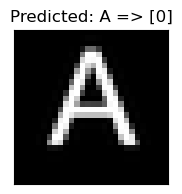

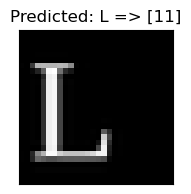

In [109]:
imgfile = ['/Users/delphi/Desktop/works/python/ML/38f1426f599056ac59dca1d852246b5d.jpg' , '/Users/delphi/Desktop/works/python/ML/L_Letter_LZNQBD.jpg']
predict_digit(imgfile)

In [83]:
label_A_Z = {}
for i in range(26):
    label_A_Z[i] = chr(65+i)

print(label_A_Z)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


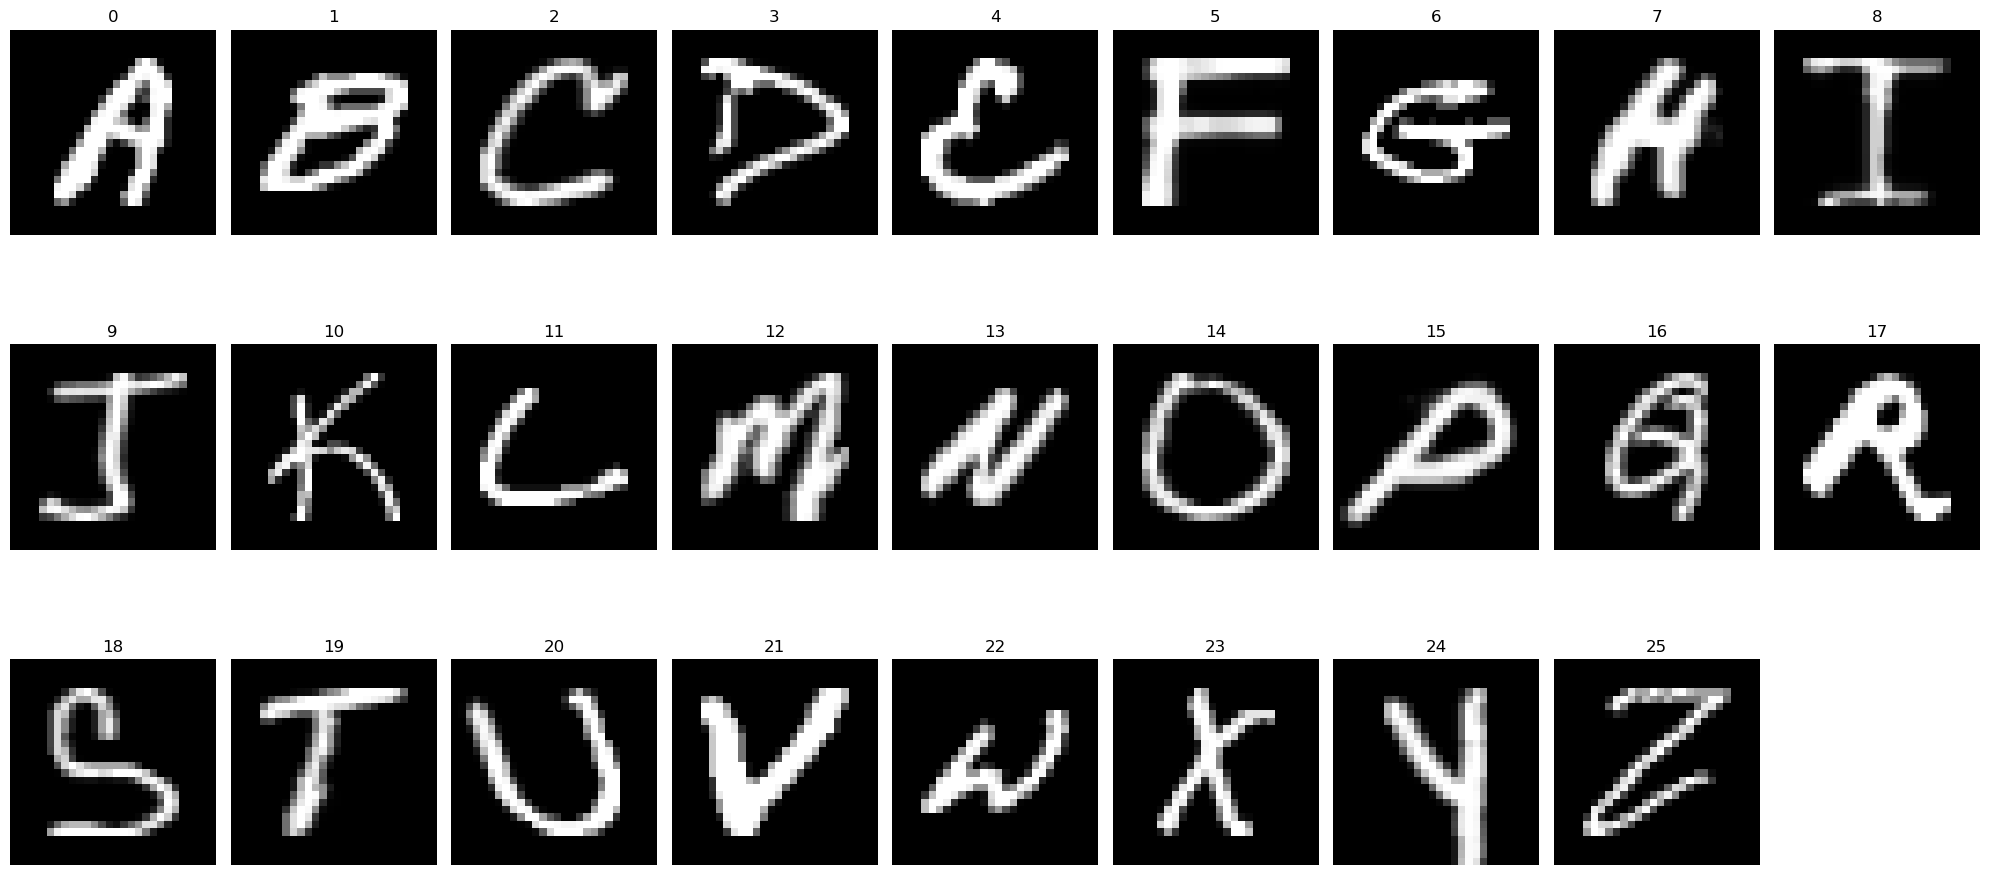

In [88]:
# แสดงภาพตัวอักษร A-Z พร้อมตัวเลขที่สอดคล้องกัน
plt.figure(figsize=(20, 10))
for i in range(26):
    plt.subplot(3, 9, i + 1)
    # เลือกภาพตัวอย่างของตัวอักษรแต่ละตัว
    idx = np.where(Y == i)[0][0]
    img = X[idx].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(i)
    plt.axis('off')

plt.tight_layout()
plt.show()